# Implementation of Feature Selection Techniques

* Feature selection is the process of reducing the number of input variables when developing a predictive model.

* It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

Feature selection techniques can be divided as follows 

* we can think about feature selection methods are in terms of supervised and unsupervised methods

* Feature Selection: Select a subset of input features from the dataset.
  * Unsupervised: Do not use the target variable (e.g. remove redundant variables).
    * Correlation
  * Supervised: Use the target variable (e.g. remove irrelevant variables).
    * Wrapper: Search for well-performing subsets of features.
      * RFE
  * Filter: Select subsets of features based on their relationship with the target.
    * Statistical Methods
    * Feature Importance Methods
* Intrinsic: Algorithms that perform automatic feature selection during training.
    * Decision Trees
* Dimensionality Reduction: Project input data into a lower-dimensional feature space.
  * PCA 

Pic credit : https://machinelearningmastery.com/
<center><img src = 'https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png' width = '500'></center>


* In  supervised we have 
1. Filter methods 
2. Wrapper Methods
3. Embedded methods

Compariion of Above Methods:


<center><img src = 'https://editor.analyticsvidhya.com/uploads/84353IMAGE1.png' width = '500'></center>




# <font color = 'red'> Filter Methods </font>

Filter feature selection methods use statistical techniques to evaluate the relationship between each input variable and the target variable, and these scores are used as the basis to choose (filter) those input variables that will be used in the model.

Pic credit : https://machinelearningmastery.com/
<center><img src = 'https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png
' width = '500'></center>

We have sklearn implementation for above statistic measures

* Pearson’s Correlation Coefficient: f_regression()
* ANOVA: f_classif()
* Chi-Squared: chi2()
* Mutual Information: mutual_info_classif() and mutual_info_regression()

# Import Section

In [153]:
from sklearn.datasets import make_regression,make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2,mutual_info_classif,SequentialFeatureSelector,RFE
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Lets download the datasets

- for regression we are working on the house pricing dataset
- for classification we are working titanic dataset

In [154]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# lets download house property prediction regression data
! kaggle competitions download -c house-prices-advanced-regression-techniques
! mkdir houseregression
! unzip house-prices-advanced-regression-techniques.zip -d houseregression
# lets download classification dataset
! mkdir titanicclassification
! kaggle competitions download -c titanic
! unzip titanic.zip -d titanicclassification

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘houseregression’: File exists
Archive:  house-prices-advanced-regression-techniques.zip
replace houseregression/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: houseregression/data_description.txt  
replace houseregression/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: houseregression/sample_submission.csv  
replace houseregression/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: houseregression/test.csv  
replace houseregression/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: houseregression/train.csv  
mkdir: cannot create directory ‘titanicclassification’: File exists
titanic.zip: Skipping, found more recently modified local copy (use --force

# Lets work on Regression feature selection



# little preprocessing for POC

In [155]:
regression_data = pd.read_csv('/content/houseregression/train.csv')
regression_data = regression_data.drop_duplicates()
#lets prepare our dataset for processing
# we will select two types of data one for Numerical Input, Numerical Output and other for categorical Input, Numerical Output
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
numinput_numoutput = regression_data.loc[:,['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','SalePrice']]
catinput_numoutput = regression_data.loc[:,['MSSubClass','OverallQual','OverallCond','CentralAir','PavedDrive','SalePrice']]
numinput_numoutput = numinput_numoutput.dropna()
catinput_numoutput = catinput_numoutput.dropna()
numinput_numoutput_x = numinput_numoutput.iloc[:,:-1].reindex()
catinput_numoutput_x = catinput_numoutput.iloc[:,:-1].reindex()
catinput_numoutput_x['PavedDrive'] = catinput_numoutput_x['PavedDrive'].map({'Y':0,'P':1,'N':2})
catinput_numoutput_x['CentralAir'] = catinput_numoutput_x['CentralAir'].map({'Y':0,'N':1})
numinput_numoutput_y = numinput_numoutput.iloc[:,-1].reindex()
catinput_numoutput_y = catinput_numoutput.iloc[:,-1].reindex()
enc = OneHotEncoder(handle_unknown='ignore')
catinput_numoutput_x_transformed = enc.fit_transform(catinput_numoutput_x).toarray()


1. Numerical Input, Numerical Output

(1195, 5)
[1.66846444e+02 1.28597048e+02 3.91700221e+02 2.27809611e+02
 3.32044281e-01 5.86133635e+01 7.66082966e+02 7.39356607e+02
 1.29309970e+02 5.74885116e-01 1.17522215e+03 7.00724016e+01
 9.15228059e-01 5.68079427e+02]


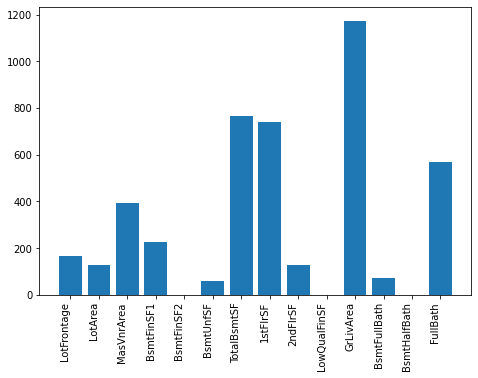

In [156]:
# pearson's correlation feature selection for numeric input and numeric output
# generate dataset
# define feature selection
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression
fs = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
X_selected = fs.fit_transform(numinput_numoutput_x, numinput_numoutput_y)
# returned best 10 features based on the f-statistic
print(X_selected.shape)
print(fs.scores_)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
columns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath']
scores = fs.scores_
ax.bar(columns,scores)
plt.xticks(rotation=90, ha='right')
plt.show()

2.Categorical Input, Numerical Output

(1460, 3)
[0.87260303 5.72918291 1.1035498  1.57227624 1.1170095 ]


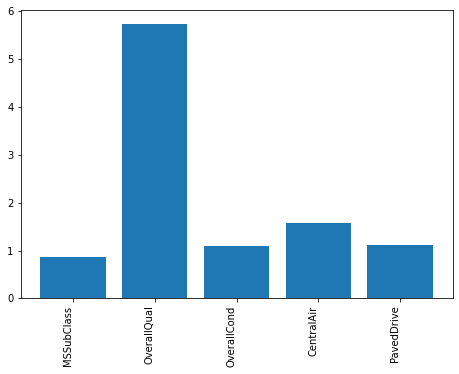

In [157]:
# ANOVA feature selection for categorical input and numerical output
# generate dataset
# define feature selection
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif
fs = SelectKBest(score_func=f_classif, k=3)
# apply feature selection
X_selected = fs.fit_transform(catinput_numoutput_x, catinput_numoutput_y)
print(X_selected.shape)
print(fs.scores_)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
columns = ['MSSubClass','OverallQual','OverallCond','CentralAir','PavedDrive']
scores = fs.scores_
ax.bar(columns,scores)
plt.xticks(rotation=90, ha='right')
plt.show()


# Classification Feature selection

# Lets Load and preprocess classification data

In [158]:
classification_data = pd.read_csv('/content/titanicclassification/train.csv')
classification_data = classification_data.drop_duplicates()
#lets prepare our dataset for processing
# we will select two types of data one for Numerical Input, Numerical Output and other for categorical Input, Numerical Output
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
numinput_catoutput = classification_data.loc[:,['Age','SibSp','Parch','Fare','Survived']]
catinput_catoutput = classification_data.loc[:,['Pclass','Sex','Embarked','Survived']]
numinput_catoutput = numinput_catoutput.dropna()
catinput_catoutput = catinput_catoutput.dropna()
numinput_catoutput_x = numinput_catoutput.iloc[:,:-1].reindex()
catinput_catoutput_x = catinput_catoutput.iloc[:,:-1].reindex()
catinput_catoutput_x['Embarked'] = catinput_catoutput_x['Embarked'].map({'S':0,'C':1,'Q':2})
catinput_catoutput_x['Sex'] = catinput_catoutput_x['Sex'].map({'male':0,'female':1})
numinput_catoutput_y = numinput_catoutput.iloc[:,-1].reindex()
catinput_catoutput_y = catinput_catoutput.iloc[:,-1].reindex()
enc = OneHotEncoder(handle_unknown='ignore')
catinput_catoutput_x_transformed = enc.fit_transform(catinput_catoutput_x).toarray()


1. Numerical Input, categorical Output

(714, 3)
[ 4.27119493  0.21459929  6.25460704 55.17948762]


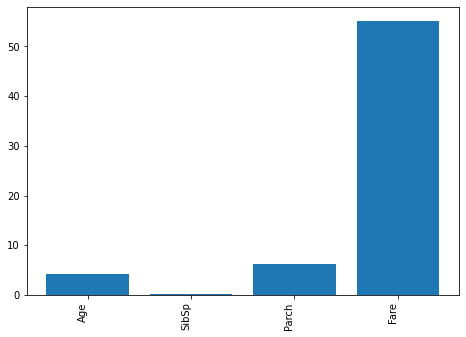

In [159]:
# ANOVA feature selection for numeric input and categorical output
# generate dataset
# define feature selection
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif
fs = SelectKBest(score_func=f_classif, k=3)
# apply feature selection
X_selected = fs.fit_transform(numinput_catoutput_x, numinput_catoutput_y)
print(X_selected.shape)
print(fs.scores_)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
columns = ['Age','SibSp','Parch','Fare']
scores = fs.scores_
ax.bar(columns,scores)
plt.xticks(rotation=90, ha='right')
plt.show()

2. Categorical Input, categorical Output

(889, 3)
[ 30.13526611 169.24230537  11.71646274]


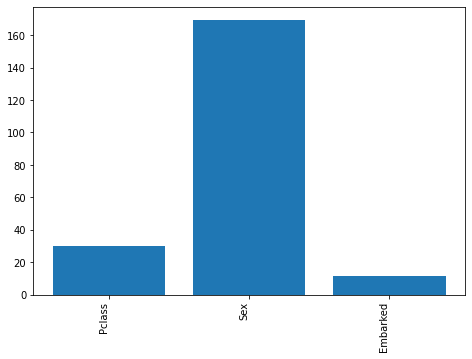

In [160]:
# chi2 feature selection for categorical input and categorical output
# generate dataset
# define feature selection
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2
fs = SelectKBest(score_func=chi2, k=3)
# apply feature selection
X_selected = fs.fit_transform(catinput_catoutput_x, catinput_catoutput_y)
print(X_selected.shape)
print(fs.scores_)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
columns = ['Pclass','Sex','Embarked']
scores = fs.scores_
ax.bar(columns,scores)
plt.xticks(rotation=90, ha='right')
plt.show()

(889, 3)
[0.05705038 0.16127037 0.02663033]


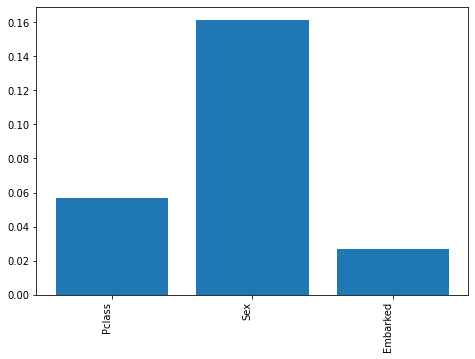

In [161]:
# mutual_info_classif feature selection for categorical input and categorical output
# generate dataset
# define feature selection
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2
fs = SelectKBest(score_func=mutual_info_classif, k=3)
# apply feature selection
X_selected = fs.fit_transform(catinput_catoutput_x, catinput_catoutput_y)
print(X_selected.shape)
print(fs.scores_)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
columns = ['Pclass','Sex','Embarked']
scores = fs.scores_
ax.bar(columns,scores)
plt.xticks(rotation=90, ha='right')
plt.show()

# <font color = 'red'> Wrapper Methods </font>

* In wrapper methods, the feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset.

* It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. 
* The evaluation criterion is simply the performance measure which depends on the type of problem, for e.g. For regression evaluation criterion can be p-values, R-squared, Adjusted R-squared, similarly for classification the evaluation criterion can be accuracy, precision, recall, f1-score, etc. 
* Finally, it selects the combination of features that gives the optimal results for the specified machine learning algorithm.

<center><img src = 'https://editor.analyticsvidhya.com/uploads/46072IMAGE2.gif' width = '500'></center>

Most commonly used techniques under wrapper methods are:

1. Forward selection

2. Backward elimination

3. Bi-directional elimination(Stepwise Selection)/Recursive Feature elimination





# lets work with boston housing prices data from sklearn 

In [162]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Forward Selection
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

# Forward selction using Sklearn

Along with sklearn mlextend also have best implementation : http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [163]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector
import numpy as np
knn = KNeighborsRegressor(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=5,direction='forward',scoring = 'neg_mean_absolute_percentage_error')
sfs.fit(X, y)
print('columns which are retained ',np.array(X.columns[sfs.get_support()]))
sfs.transform(X).shape


columns which are retained  ['CRIM' 'CHAS' 'NOX' 'RM' 'LSTAT']


(506, 5)

In [164]:
X.columns[sfs.get_support()]

Index(['CRIM', 'CHAS', 'NOX', 'RM', 'LSTAT'], dtype='object')

# Backward elimination using sklearn

In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

In [165]:
knn = KNeighborsRegressor(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=5,direction='backward',scoring = 'neg_mean_absolute_percentage_error')
sfs.fit(X, y)
print('columns which are retained ',np.array(X.columns[sfs.get_support()]))
sfs.transform(X).shape

columns which are retained  ['CRIM' 'CHAS' 'NOX' 'RM' 'LSTAT']


(506, 5)

# Recursive Feature elimination: 

It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [166]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
from sklearn.svm import SVR
estomator = SVR(kernel="linear")
selector = RFE(estomator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
print('columns which are retained ',np.array(X.columns[selector.support_]))
selector.support_
selector.ranking_

columns which are retained  ['CHAS' 'NOX' 'RM' 'PTRATIO' 'LSTAT']


array([3, 5, 4, 1, 1, 1, 6, 2, 8, 9, 1, 7, 1])

# Embedded Methods:

<center><img src = 'https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Embedded_1.png' width = '500'></center>

* Embedded methods combine the qualities’ of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods.

* Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting.

* Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
* Ridge regression performs L2 regularization which adds penalty equivalent to square of the magnitude of coefficients.

* Even Decision Trees, random Forest gives the importance of the features.

* Other examples of embedded methods are Regularized trees, Memetic algorithm, Random multinomial logit